<a href="https://colab.research.google.com/github/ARJUN151503/Spam-Email-Classification-using-NLP-and-ML-by-EDUTECH/blob/main/Spam_Email_Classification_using_NLP_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import required Libraries

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

In [3]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1") #Data Loading

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
df.shape

(5572, 2)

# EDA

NULL VALUES

In [9]:
df.isnull().sum()

,0
v1,0
v2,0


In [10]:
df.isnull().any()

,0
v1,False
v2,False


Duplicate Values

In [11]:
df['v2'].nunique()

5169

In [12]:
df['v2'].drop_duplicates(inplace=True)

In [13]:
df.shape

(5572, 2)

In [14]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Class Distribution

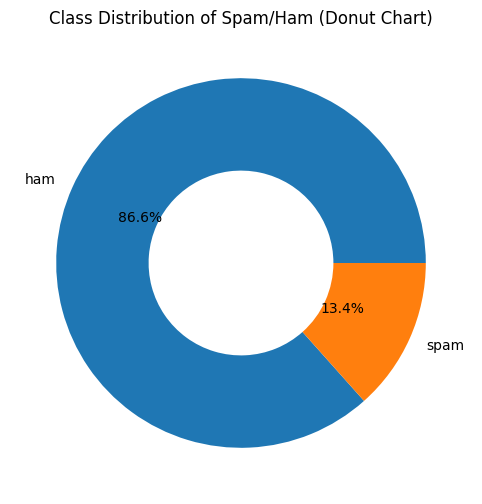

In [22]:
plt.figure(figsize=(8, 6))
class_counts = df['v1'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', wedgeprops=dict(width=0.5))
plt.title('Class Distribution of Spam/Ham (Donut Chart)')
plt.show()

## Word Count

In [16]:
from collections import Counter
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
# Concatenate all texts into a single string
all_text = ' '.join(df['v2'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [18]:
# Split the text into individual words
words = all_text.split()

In [19]:
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [20]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 1466),
 ('u', 692),
 ('2', 453),
 ('call', 376),
 ('get', 326),
 ('U', 299),
 ('ur', 293),
 ("I'm", 286),
 ('&lt;', 276),
 ('You', 263),
 ('4', 249),
 ('.', 235),
 ('go', 234),
 ('know', 224),
 ('like', 222),
 ('got', 204),
 ('come', 198),
 ('?', 187),
 ('...', 163),
 ('want', 157),
 ('Call', 155),
 ('time', 154),
 ('send', 150),
 ('going', 142),
 ('need', 141),
 ('n', 137),
 ("I'll", 137),
 ('How', 137),
 ('still', 134),
 ('If', 133),
 ('one', 132),
 ('But', 131),
 ('No', 126),
 ('text', 126),
 ('Just', 119),
 ('We', 119),
 ('So', 118),
 ('love', 114),
 ('good', 114),
 ('think', 113),
 ('Do', 113),
 ('see', 113),
 ('r', 113),
 ('back', 111),
 ('home', 107),
 ('&', 107),
 ('Ì_', 105),
 ('tell', 104),
 ('Your', 104),
 ('take', 101),
 ('What', 101),
 ('day', 101),
 ('free', 99),
 ('My', 99),
 ('And', 98),
 ('Ok', 97),
 ('me.', 97),
 ('dont', 97),
 ('The', 95),
 ('mobile', 94),
 ('A', 92),
 ("i'm", 91),
 ('FREE', 90),
 ('make', 90),
 ('new', 89),
 ('-', 88),
 ('phone', 88),
 ('late

<ipython-input-23-3ef409f3b366>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_values, y=x_values, orient='h', palette='coolwarm')


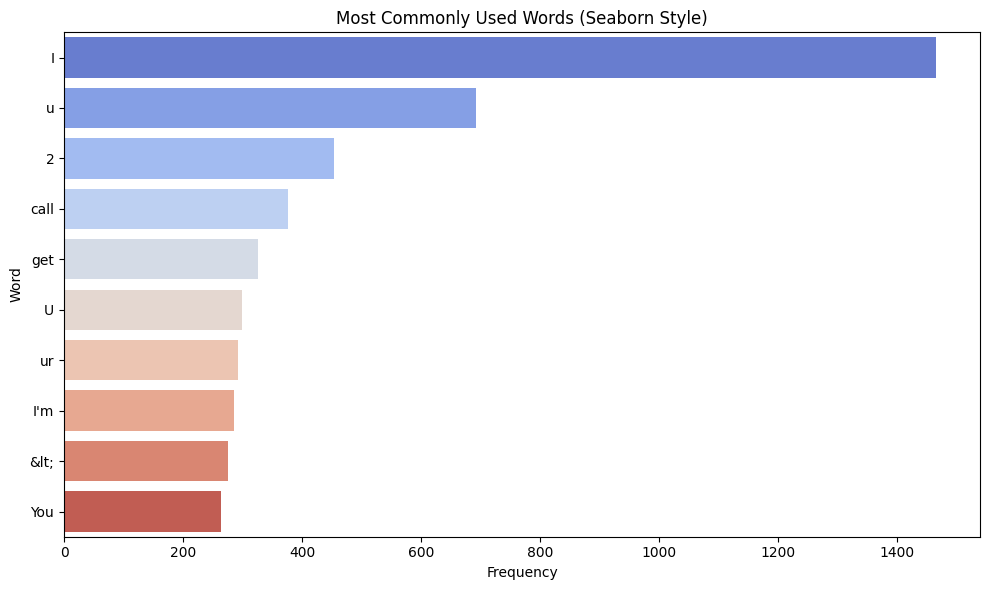

In [23]:
plt.figure(figsize=(10, 6))
top_words = word_counts.most_common(10)
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
sns.barplot(x=y_values, y=x_values, orient='h', palette='coolwarm')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Most Commonly Used Words (Seaborn Style)')
plt.tight_layout()
plt.show()